# Modeling and Simulation
## Lab 3: Machine Learning
## _Klas Henriksson klhe0017_
## _Submission 1_

> Machine learning is the study of computer algorithms
<br> that improve automatically through experience. [[1]](https://en.wikipedia.org/wiki/Machine_learning)

Implementing special-purpose, use-once-and-then-throw-away solutions<br>
for every new prediction task is time-consuming and inefficient.<br>
Instead, we use reusable general-purpose machine-learning models.

In recent years, the set of easily available machine learning models<br>
has steadily increased, and Python has emerged as a go-to.

With its standardized interfaces, scikit-learn [[2]](https://scikit-learn.org/stable/) has one of the most popular<br>
and easy-to-use machine learning libraries 
with a rich set of tutorials [[3]](https://scikit-learn.org/stable/tutorial/index.html).

Other popular libraries are TensorFlow [[4]](https://www.tensorflow.org) and Keras [[5]](https://keras.io).

# Examination

Write your report in this Jupyter notebook [[6]](https://jupyter.org) and hand it in.

You can collect up to 4 points.
- 1 point for completing the task 1-5 listed in the notebook<br>
  (this is the minimum to pass the lab).
- 1 point for demonstrating conceptual understanding<br>
  by documenting, interpreting, and explaining what you<br>
  are doing to solve tasks 1-5.
- 1 point for implementing logistic regression with gradient descent<br>
  and deriving the gradient
  (at the end of the notebook).
- 1 point for implementing, explaining, and comparing<br>
  cross validation and bootstrapping<br>
  (at the end of the notebook).

Do not forget to enter your name and submission number at the top!

# Assignment

In this lab, you are going to use the Titanic data set, explore it, and evaluate<br>
the performance of different machine learning models for a supervised classification<br> task. Along the way, you are going to review the root of basic challenges in<br>
machine learning and address them when fitting your models.

Based on some input data, computer algorithms derive the best parameters<br>
for a given machine learning model. However, your model can only be as good<br>
as your data is. We have to expect that data from real-world measurements<br>
are noisy.

### Why is this a problem?

In general, we don't know where the noise comes from, or in other words,<br>
how it is distributed, and, therefore, we cannot remove it. When we train<br>
a machine learning model on noisy data, the model picks up the noise and<br>
reflects it in its parameters.

In extreme cases, with strong noise, or when the chosen model is very flexible,<br>
we may end up with a useless classifier that picks up too much of the noise.

## Task 1
Explain the bias-variance trade-off with your own words, using an example. <br>
Describe ways to avoid underfitting and overfitting.

To explain the bias-variance tradeoff I belive it is helpful to construct a thorough understanding of the goals with machine learning first. 

In general, Machine Learning is employed to be able to train a "machine" on existing data, for it to then be able to make prediction about completely novel data. To make this more concrete, suppose that we want to train a machine to be able to predict the quality of a fruit, say a clementine, based on its color and softness. We define the domain of the quality to be within [0,1], where 0 represent a really bad clementine that tastes really bad, and 1 being a pristine clementine. We denote the color and softness of a clementine as its "features", and we say that the features of a clementine can be represented by the variable *X*. If we let the quality of a clementine be denoted by *y*, we say that there is a relation between *X* and *y* through some function *f*:
$$ y = f(X) + \epsilon $$
where we assume we have an error term $\epsilon$ with a zero mean that is independent of the feature $X$. Now, we do not know the function $f$, but we would like to use machine learning to estimate it. If we have a set of features, i.e a set of *samples* $X_1$, $X_2$, .., (hereby denoted $\{X_i\}$) where we have assigned each sample its quality $y_1$, $y_1$, .., we can use that data to estimate $f$. Lets denote our *predicted* quality of a clementine $\hat{y}$, and our estimated $f$ as $\hat{f}$. We call $\hat{f}$ our estimator. Our predicted quality of a clementine with features $X$ can then be written as
$$\hat{y} = \hat{f}(X)$$
Given a set of samples $\{X_i\}$ and its respective qualities $\{y_i\}$, One measure of the performance of an estimator $\hat{f}$ is the mean squared error (MSE)
$$MSE = \frac{1}{n}\sum_{i=1}^n\left(y_i - \hat{f}(X_i)\right)^2 $$
It is reasonable to argue that a good estimator $\hat{f}$ is one that minimizes the MSE of our sample data, but this is not the entire truth. To understand this, let us reiterate our goal: We want to build a machine that can determine, or rather, estimate with good accuracy, the quality of a clementine given its features. We also assume that we have a set of clementines from earlier, and that each clementines quality in this set has been determined. What we can do is to split up this set into two sets, a *training set*, $\{X_i\}_{train}$ and a *test set* $\{X_i\}_{test}$. We only use $\{X_i\}_{train}$ to estimate $\hat{f}$, and we then test our estimator on the test data $\{X_i\}_{test}$. Our ideal $\hat{f}$ is one that accurately predicts the quality of the clementines in this test set. That is, one that minimizes the MSE on novel data.

One can show that the expected MSE for any novel sample $X_0$ can be decompesed into three terms:
$$E\left[\left(y_0 - \hat{f}(X_0)\right)^2\right] = Var\left[\hat{f}(X_0)\right] + \left(Bias\left[\hat{f}(X_0)\right]\right)^2 + Var\left[\epsilon\right]$$
We can now reformulate our goal: We wish to find an estimator $\hat{f}$ which has *low variance* and *low bias*. The $Var[\epsilon]$ term is an irreducible error term followed from the original definition of the relationship between $y$ and $X$. This, as it turns out, is not the easiest. And this is where the Bias-Variance tradeoff comes into play. These terms, the variance and bias, arise from the different choices of $\hat{f}$. If we choose $\hat{f}$ such that it fits the training samples extremely good (resulting in a minimal training MSE), it will in general result in a high variance on novel data. We have *overfitted* our training data, it models the *training* data **very** good, but it does not deal with new clementine samples very well, it can give widely different prediction to novel samples. The model's bias is very low though, as all features are taken into consideration. On the other hand, if we use a crude estimator that does not fit the training data very well, i.e does not account for all samples very well, we have *underfitted* the data. This results in general in a high bias but low variance: the model fits new data equally well (or, rather, bad), but it does so **consistently**. In general, increasing the model's complexity - how well it fits to trainning data - will increase its bias but decreace variance. The goal is to find the sweet-spot where the combined error is minimized. This balance act is the *Bias-Variance tradeoff*.

One can then decrease variance, at the expense of an increase in bias, by reducing the complexity of the model. In a similar way one can decrease bias at the expense of an increase in variance by increasing the model's complexity. 


# Familiarising yourself with the data

The first step in solving a learning challenge is to understand your data.<br>
We will use the Titanic data set. It is a good starting point if you're new<br>
to machine learning.

## Task 2

1. Describe the data set.
2. What is the task (that is, what is it that you should predict)?
3. What features are there?
4. What preprocessing do you expect you have to do?


1. The dataset consists of data from passengers on the Titanic. Each passenger has a set of features (described in point 3). In total the data is 1311 entries long. The data contain some "holes" in it, e.g entries with no values in them.
2. Determine, given a passengers features, whether or not the passenger survives the sinking of Titanic.
3.  * passenger class
    * whether the person survived or not
    * age
    * sex
    * fare
    * number of sibblings aboard
    * number of parents aboard
    * ticket number
    * cabin where they stayed
    * where they embarked from
    * what lifeboat they took
    * body number if found dead
    * home dest.
4. I expect to have to preprocess the data in a few ways. First, some data I believe is irrelevant to the task at hand. This includes the ticket number, where they embarked from, their home destination and the cabin where they stayed. I would also expect to remove the body number and the lifeboat they took, as they are only available if the passenger actually died or if it survived, respectively, which is what we are set out to determine. I also expect to have to somehow deal with the holes in the dataset. This can be done by simply removing them or by imputating them. Normalization can also be done. The "sex" column I would convert to a numerical representation.

### Load your data below

In [7]:
# Pandas lets us create "data frames" that works well with sklearn
# Documentation: https://pandas.pydata.org/docs/
import pandas as pd
import numpy as np

# If you run on colab, the sklearn version is older than what you get with anaconda
#import sklearn
#print("sklearn version:", sklearn.__version__) # sklearn version: 0.22.2.post1

# Load your data set
data = pd.read_csv("titanic3.csv") 

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Task 3
Sometimes, simple descriptive statistics can reveal a lot<br>
about a data set. For example, you could find highly<br>
informative or un-informative features using some plots.

1. Explore your data by using some basic<br>statistical analysis and plotting.
2. Describe and interpret what you find.

1. See below for plots made
2. We can see several things from the data. First, from the age data we see that there were most 20-30 year olds in the dataset. We also see that survival chance is the highest at those ages. The passenger class and fare columns is also quite telling - People travelling in first class and/or paying a lot for their fare seem to be most likely to survive. Gender also seem to be a good indicator - A larger proportional of females survived compare to men. 

In [8]:
# Import plotting libraries
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)
# Seaborn documentation: https://seaborn.pydata.org
import seaborn as sns
sns.set()

# Here are some examples, but you probably need to create other plots...

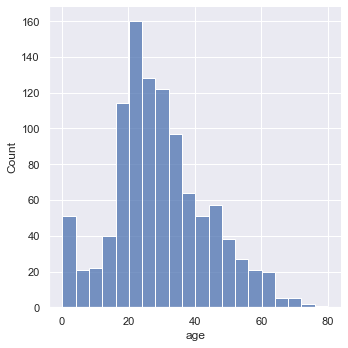

In [4]:
# Plot the age distribution
sns.displot(data, x="age", bins=20)

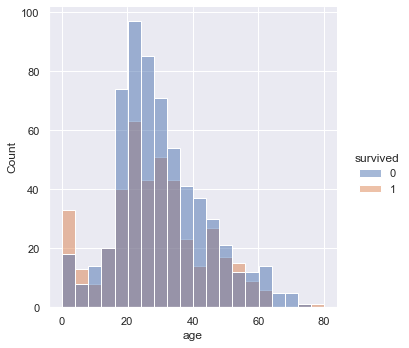

In [5]:
# Maybe better to plot per class?
sns.displot(data, x='age', hue="survived", bins=20)

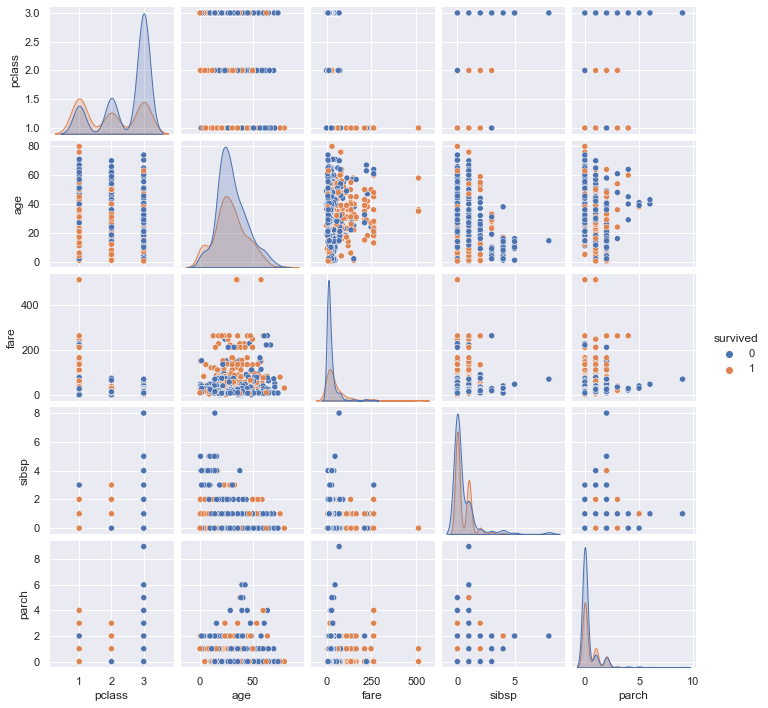

In [6]:
# Pair plots can help you get an intuition for
# how the data is distributed.
# (You need to preprocess categorical features to include them in the pairplot.)
sns.pairplot(data, vars=["pclass", "age", "fare", "sibsp", "parch"], hue='survived', height=2);

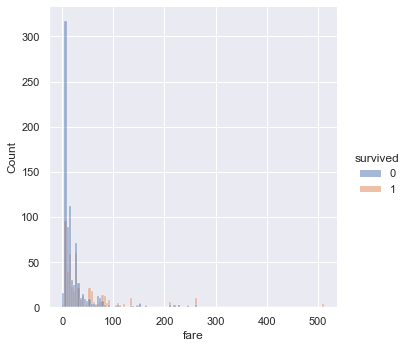

In [11]:
#plot fare histogram
sns.displot(data, x="fare", hue="survived")

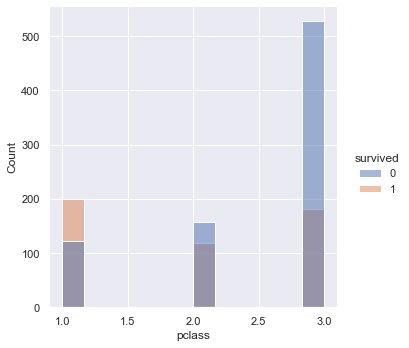

In [10]:
# plot pclass histogram
sns.displot(data, x="pclass", hue="survived")

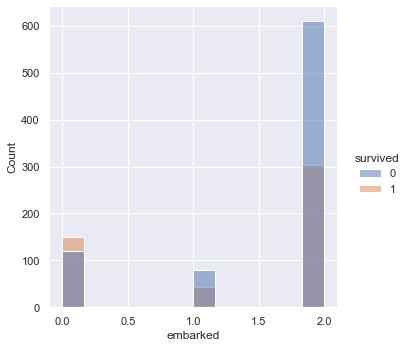

In [12]:
# plot embarked data
embrkd_numeric = data['embarked'].replace(to_replace=('C', 'Q', 'S'), value=(0,1,2))
data_cpy = data.copy()
data_cpy['embarked'] = embrkd_numeric;
sns.displot(data_cpy, x='embarked', hue='survived')


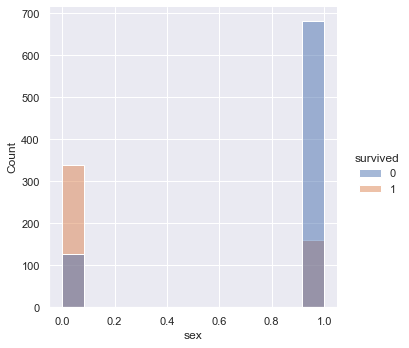

In [38]:
# plot gender data
data_cpy['sex'] = data['sex'].replace(to_replace = ('female', 'male'), value=(0, 1))
sns.displot(data_cpy, x='sex', hue='survived')

# Prepare the data

In [9]:
# You will probably need to scale the data or deal with missing values
# Imputation is when you replace missing values by the mean or median,
# but what about a categorical value, such as gender?
# When should you use the mean vs the median?

from sklearn.preprocessing import \
    MaxAbsScaler, StandardScaler, LabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# train_test_split can help you create training and test sets from your data.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# 1. Imputation
# 2. Preprocessing
# 3. Split into train and test sets

# Convert data into numeric representation
numeric_data = data

# Convert sex to a numerical representation. Female was arbitrarily set to 0 and male to 1.
gender_col = data['sex'].replace(to_replace = ('female', 'male'), value=(0, 1))
numeric_data['sex'] = gender_col

# Drop a bunch of columns that we do not need
#
# Most are pretty self explanatory
# Home Dest., ticket number, name or cabin can reasonably be thought to have NO impact on wheter a passenger
# survives or not.
#
# Boat and body are dropped since they are only available if we know the outcome - if they survived or not - and thus cant be used in our model.
'''numeric_data = numeric_data.drop('home.dest', axis=1)
numeric_data = numeric_data.drop('name', axis=1)
numeric_data = numeric_data.drop('ticket', axis=1)
numeric_data = numeric_data.drop('body', axis=1)
numeric_data = numeric_data.drop('cabin', axis=1)
numeric_data = numeric_data.drop('boat', axis=1)

# we should drop this right?
# numeric_data['embarked'] = data['embarked'].replace(to_replace=('C', 'Q', 'S'), value=(0,1,2))
numeric_data = numeric_data.drop('embarked', axis=1)'''
numeric_data = numeric_data[['age', 'sex', 'fare', 'sibsp', 'pclass', 'parch', 'survived']].copy()

print(f'{numeric_data.head()}')

# Imputate NaNs

print(f"NaNs: \n{numeric_data.isnull().sum()}")
# We actually drop all NaNs.
# We have 263 NaNs in age and 1 in fare.
# So, dropping one row from the fare NaN is probably OK
# However, it is a bit more questionable to drop 263 entries from the age NaNs. I think this makes
# more sense than imputing, lets say the mean, as that will create a huge spike for a certain age, which might
# introduce a bias in the data. So in that sense I believe it is better to just drop it right away.
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

numeric_data['age'] = imputer.fit_transform(numeric_data[["age"]])
numeric_data = numeric_data.dropna()

# Scale data
scaler = MinMaxScaler()

numeric_data["age"] = scaler.fit_transform(numeric_data[["age"]])
numeric_data["fare"] = scaler.fit_transform(numeric_data[["fare"]])

X = numeric_data.drop(['survived'], axis=1).values
y = numeric_data['survived'].values

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y)

(X_train.shape, X_test.shape)

     age  sex      fare  sibsp  pclass  parch  survived
0  29.00    0  211.3375      0       1      0         1
1   0.92    1  151.5500      1       1      2         1
2   2.00    0  151.5500      1       1      2         0
3  30.00    1  151.5500      1       1      2         0
4  25.00    0  151.5500      1       1      2         0
NaNs: 
age         263
sex           0
fare          1
sibsp         0
pclass        0
parch         0
survived      0
dtype: int64


((981, 6), (327, 6))

# Plot of the processed data

     age  sex      fare  sibsp  pclass  parch  survived
0  29.00    0  211.3375      0       1      0         1
1   0.92    1  151.5500      1       1      2         1
2   2.00    0  151.5500      1       1      2         0
3  30.00    1  151.5500      1       1      2         0
4  25.00    0  151.5500      1       1      2         0


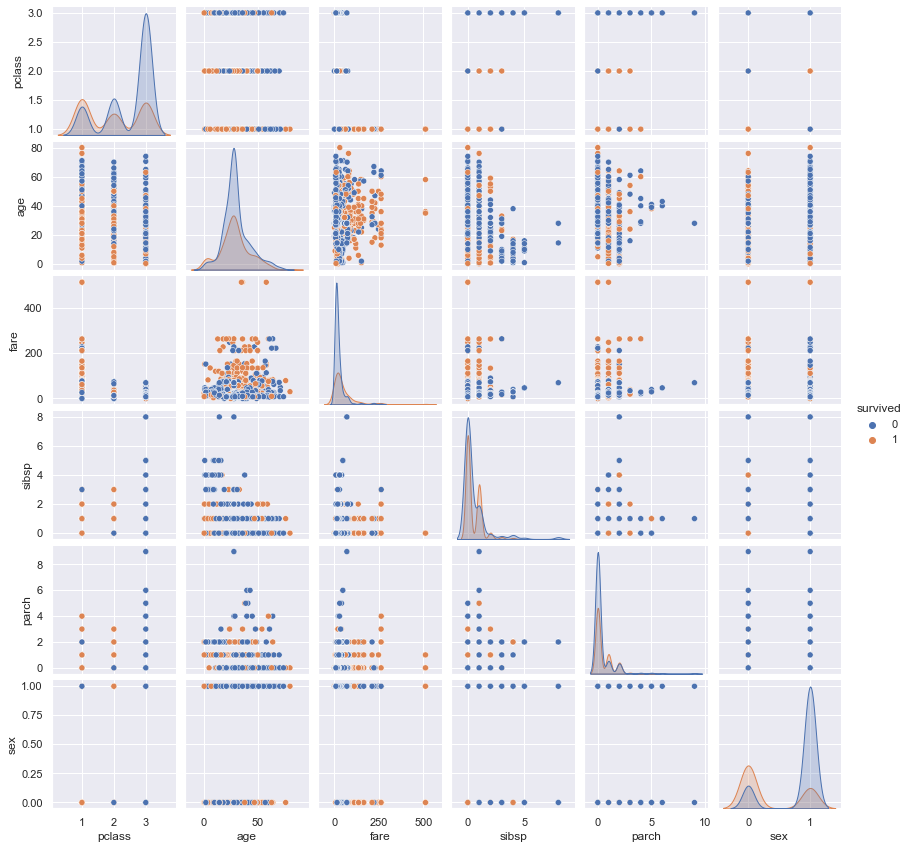

In [25]:
# first print data
print(f'{numeric_data.head()}')
sns.pairplot(numeric_data, vars=["pclass", "age", "fare", "sibsp", "parch", "sex"], hue='survived', height=2);

# Training machine learning models and tuning parameters

Now that you have familiarized yourself with your data set<br>
and you know what the classification task is about, it's time<br>
to select machine learning models.

## Task 4

### a) Fit the models
- Pick at least 2 machine learning models and fit them to your<br>
training data using cross-validation to tune the model parameters.<br>
In the documentation for each model, you can find different _hyperparameters_<br>
to test using `GridSearchCV`.

- Explain with your own words how the 2 models make predictions.


**DecisionTree**
A descision tree takes in the dataset and builds up a tree from which prediction can be made. In our case of a binary output (survived = yes or no), each node in the tree divides the data into two separate parts based on a certain feature and splitting point of the dataset. For example, a split could be "Is 'age' between 0.3 and 0.4?" or "Is person a female?". The training data is then split into two parts, one with samples with values to the 'left' of the splitting point and one with samples with values to the 'right'. Each successive part is then split recursively in the same manner for another feature and splitting point. This builds up a decision tree structure where the final leaf nodes indicate wheter or not sample reaching it survives or not. The tree is created when it is fitted to the training data. Prediction of a new sample then works by checking in what leaf node this new sample ends up when ran through the desiscion tree. The final leaf nodes value is the predicted label (here wheter or not it survived).

**Multilayer Perceptron classifier**
A Multilayer Perceptron classifier is a type of neural network. A neural network is consists of an input layer, a set of hidden layers and an output layer. Each layer consists of a set of nodes. The value of the input nodes are the input features of a sample. Every node in layer $i$ connects to every node in layer $i+1$ with a weight. Each node (except the input nodes) produce an output based on the sum of their inputs and their weights. The accumulated input is ran through a certain activation function which transforms it into an output. Common activation functions is the inverse tan function, $f(x) = \tanh(x)$ function and the ReLU function, $f(x) = max(0, x)$. Training works by choosing the different weights so inputs yield expected outputs in the last layer. This is in practice a optimization problem of minimizing the error between predicted and expected output. Prediction then works by simply inputting a samples features into the pre-trained net and check what its output nodes values are.

# DecisionTree train

In [42]:
# Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# There are many other models to choose from...
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

# Import GridSearchCV to optimise hyperparameters
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(random_state=1)

# By default, GridSearchCV can create huge trees, so we put a max limit.
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 4, 8, 16, None],
    "min_samples_split" : [2, 3, 4, 5],
}

# Create a GridSearchCV with the decision tree as the estimator
# and use 10-fold cross-validation
# User guide: https://scikit-learn.org/stable/modules/grid_search.html#grid-search
grid_search = GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           cv=10,
                           return_train_score=True,
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# GridSearchCV uses accuracy as score by default for classification tasks.
print("Best accuracy:", grid_search.best_score_)


Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}
Best accuracy: 0.8093485879200164


Accuracy: 0.8287461773700305
Precision:  0.7833333333333333
Recall: 0.7580645161290323


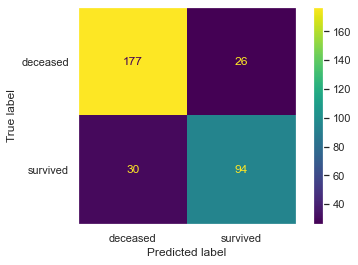

In [43]:
# Produce the confusion matricies and model eval
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, \
    accuracy_score, precision_score, recall_score

# Example: one way to present results
# There's also metrics.classification_report
y_predict = grid_search.predict(X_test)

plot_confusion_matrix(grid_search, X_test, y_test, display_labels=["deceased", "survived"])
plt.grid(False)

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))

# MLP Train

In [44]:
from sklearn.neural_network import MLPClassifier

# Import GridSearchCV to optimise hyperparameters
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=1)

# By default, GridSearchCV can create huge trees, so we put a max limit.
param_grid = {
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001, 0.01],
    "hidden_layer_sizes": [(50,), (100,), (50, 50), (100, 50), (400, 200, 150), (400, 200), (200, 150), (450, 170)],
    "max_iter": [1000]
}

# Create a GridSearchCV with the decision tree as the estimator
# and use 10-fold cross-validation
# User guide: https://scikit-learn.org/stable/modules/grid_search.html#grid-search
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           cv=10,
                           return_train_score=True,
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# GridSearchCV uses accuracy as score by default for classification tasks.
print("Best accuracy:", grid_search.best_score_)



Fitting 10 folds for each of 48 candidates, totalling 480 fits
Best parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50), 'max_iter': 1000}
Best accuracy: 0.7991135848278705


Accuracy: 0.8042813455657493
Precision:  0.7586206896551724
Recall: 0.7096774193548387


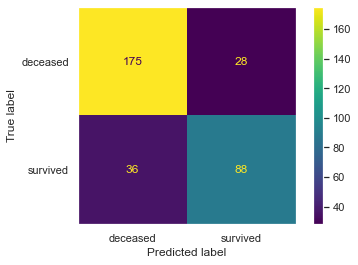

In [45]:
# Produce the confusion matricies and model eval
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, \
    accuracy_score, precision_score, recall_score

# Example: one way to present results
# There's also metrics.classification_report
y_predict = grid_search.predict(X_test)

plot_confusion_matrix(grid_search, X_test, y_test, display_labels=["deceased", "survived"])
plt.grid(False)

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision: ", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))

# Model evaluations

With the model parameters, you can move on and estimate<br>
the performance of your models.

## Task 5
- Use confusion tables to show the models' performance.

- Calculate performance measures, such as accuracy,<br>
precision, and recall.

- Discuss your findings.
    - Compare the models' performance.
    - Describe how do they differ.
    - Which one did best? Can you explain why?

1+2: See confusion tables and perf. measures above

As we can see from the confusion tables and performance measures above for the two different models, the Decision Tree Classifier seem to outperform the MLP classifier. The accuracy of the DT classifier is roughly 2 percentage points higher than the MLP, so that is not a very big difference. The precision is also quite similar (DT classifier is roughly 3 percentage points better), but there is a noticeable difference in the recall score between the DT and MLP classifier. The DT classifier has almost 5 more percentage points. This means that the MLP reports more false positivies (meaning that it incorrectly predicts that someone survived when in fact they died) than the DT classifier. It is a difficult to explain why the DT classifier outperforms the MLP classifier. One reason could be that we have not found the best hyperparameters for the MLP classifier yet. As it has a lot of different hyperparameters that can be tweaked compared to the DT classifier, it is more time consuming to find a good set of hyperparameters for it.



# Bonus 1 (1 point)
In logistic regression, the likelihood function is given by the sigmoid
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

## Tasks
- Derive the gradient of the cross entropy used in logistic regression.
  
  To simplify the calculations, define
  $$ \mathbf{\hat{x}}_i = [\mathbf{x}_i, 1] $$
  $$ \mathbf{\hat{w}} = [\mathbf{w}, b] $$
  to account for the bias in the dot product
  $\mathbf{\hat{w}} \cdot \mathbf{\hat{x}}_i$.

  The cross entropy is
  $$ E(\mathbf{\hat{w}}) = -\sum_i y_i \log f_i + (1 - y_i) \log (1 - f_i) $$
  where $f_i = \sigma(\mathbf{\hat{w}} \cdot \mathbf{\hat{x}}_i)$
  The gradient of the cross entropy is
  $$ \nabla E(\mathbf{\hat{w}}) = \sum_i \mathbf{\hat{x}}_i (f_i - y_i). $$
  You can use the fact that
  $$ \frac{d\sigma}{dz} = \sigma(z) \left( 1-\sigma(z) \right). $$

- Implement logistic regression and gradient descent and fit your model<br>
  to the training set.

- Compare the performance to the best model you found before<br>
  (using the test set).
- Comment on the results.

Derivation of the gradient of the cross entropy used in logistic regression:
We have the cross entropy defined above.

We have:
$$\nabla_iE(\mathbf{\hat{w}}) = \frac{\partial E(\mathbf{\hat{w}})}{\partial w_i}$$
$$ \frac{\partial E(\mathbf{\hat{w}})}{\partial w_i} = y_i\frac{\partial log f_i}{\partial w_i} + (1-y_i)\frac{\partial log (1-f_i)}{\partial w_i} = 
y_i\frac{1}{f_i}\frac{\partial f_i}{\partial w_i} + (1-y_i)\frac{-1}{1-f_i}\frac{\partial f_i}{\partial w_i} = y_i\frac{1}{f_i}f_i(1-f_i)\frac{\partial \mathbf{\hat{w}} \cdot \mathbf{\hat{w_i}}}{\partial w_i} + (1-y_i)\frac{-1}{1-f_i}f_i(1-f_i)\frac{\partial \mathbf{\hat{w}} \cdot \mathbf{\hat{w_i}} }{\partial w_i} = y_i(1-f_i)x_i - (1-y_i)f_ix_i = $$


$$y_i(1-f_i)x_i - (1-y_i)f_ix_i = y_ix_i - y_if_ix_i - f_ix_i+y_if_ix_i = y_ix_i-f_ix_i = x_i(y_i - f_i) \Rightarrow \nabla E(\mathbf{\hat{w}}) = \sum_i{\mathbf{\hat{x_i}}(f_i-y_i)}

In [1]:
def sigmoid(x):
    """
    The likelihood function
    """
    return 1 / (1 + np.exp(-x))

In [2]:
def log(p):
    """
    Auxillary function to avoid multiplying with -Inf

    When
        y = f = 0
    the expression
        y * np.log(f) = 0 * -Inf = NaN

    Returns
    -------
    the log of p when p is positive, else 0
    """
    return np.log(p) if p > 0 else 0

In [122]:
def update(X, y, w, b, alpha):
    """
    Perform one step of gradient descent

    Parameters
    ----------
    X
        list of features (n_samples, n_features)
    y
        list of targets (n_samples, 1)
    w
        weights (n_features)
    b
        bias
    alpha
        the learning rate

    Returns
    -------
    w
        the updated weights 
    b
        the updated bias
    """

    de_dw = np.zeros(np.shape(w))
    de_db = 0.0

    for X_iter,y_iter in zip(X,y):
        f = sigmoid(np.dot(X_iter, w) + b)

        de_dw += X_iter * (f-y_iter)
        de_db += f-y_iter;

    w -= de_dw * alpha
    b -= de_db * alpha 

    return w, b

In [114]:
def error(X, y, w, b):
    """
    Calculate the loss function in logistic regression
    using the cross entropy

    Parameters
    ----------
    X
        list of features (n_samples, n_features)
    y
        list of targets (n_samples, 1)
    w
        weights (n_features)
    b
        bias

    Returns
    -------
    err
        the cross entropy    
    """
    
    err = 0.0
    for X_iter,y_iter in zip(X,y):
        f = sigmoid(np.dot(X_iter, w) + b)
        err+= -(y_iter * log(f) + (1-y_iter)*log(1-f))

    return err

In [123]:
def train(X, y, w, b, alpha=0.001, epochs=10000):
    """
    Optimize the model parameters w and b using gradient descent

    Parameters
    ----------
    X
        list of features (n_samples, n_features)
    y
        list of targets (n_samples, 1)
    w
        weights (n_features)
    b
        bias
    alpha
        the learning rate
    epochs
        the number of gradient descents epochs
    
    Returns
    -------
    w
        the optimized weights
    b
        the optimized bias
    """

    loss = []

    for e in range(epochs):
        w, b = update(X,y,w,b,alpha)

        if e % 400 == 0 or e == epochs-1:
            l = error(X,y,w,b)
            loss.append(l)

    return w, b, loss

In [124]:
# Initial weights and bias
print(X_train.shape[1])
w0 = np.zeros_like(X_train[1,:])
print(w0)
b0 = 0.0

# Train the model
w, b, loss = train(X_train, y_train, w0, b0)

6
[0. 0. 0. 0. 0. 0.]


In [125]:
print(loss)

[646.0076601308007, 456.0988030106723, 452.6694981908656, 452.11342866693724, 452.0125607590375, 451.9916757900265, 451.9862292893352, 451.9842848585064, 451.98338673366885, 451.98291294766676, 451.98264968512245, 451.9825007139719, 451.9824158821873, 451.9823674621627, 451.9823397982621, 451.9823239853375, 451.98231494393514, 451.982309773313, 451.98230681591673, 451.98230512422873, 451.9823041564768, 451.9823036028296, 451.9823032860771, 451.9823031048507, 451.98230300116086, 451.9823029419436]


In [119]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, \
    accuracy_score, precision_score, recall_score

# Test the optimized model parameters on the test set.
# You also need to computer other metrics to compare to the best model from before.
y_pred = []

for x in X_test:
    f = sigmoid(np.dot(w, x) + b) > 0.5
    y_pred.append(f)

# Display a basic confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.7767584097859327
Precision:  0.7363636363636363
Recall: 0.648


array([[173,  29],
       [ 44,  81]], dtype=int64)

# Bonus 2 (1 point)

## Tasks
Implement the resampling techniques cross validation and bootstrapping.

Fill in the missing code in the code blocks below and document your code with comments.

Also, describe with your own words how cross validation and bootstrapping work and why these techniques are used.

In [120]:

def my_cross_validation(samples, k = 2):
  """
  Our own, basic implementation of cross validation.

  Parameters
  ----------
  samples
    A list of samples.
  
  k
    The number of folds we would like to use. Default: 2.

  Returns
  -------
  A list with k elements where each element contains one 
  training and one validation set.

  Example
  -------
  samples = [x1, x2, x3, x4, x5, x6]
  k       = 3

  Then, when we run 
  >>> folds = my_cross_valudation(sample, k)
  we expect that folds holds the following list (or similar, depending
  on the details of your implementation)
  [([x3,x4,x5,x6],[x1,x2]), ([x1,x2,x4,x5],[x3,x4]), ([x1,x2,x3,x4],[x5,x6])]

  """
  folds = []
  validation_fraction = 1/k
  num_samples = len(samples)
  num_validation_samples = np.floor(validation_fraction * num_samples).astype(int)

  for i in range(k):
    start_idx = i * num_validation_samples
    end_idx = start_idx + num_validation_samples

    validation_set = samples[start_idx:end_idx]

    training_set = None
    if start_idx == 0:
      training_set = samples[end_idx:]
    elif end_idx == num_samples:
      training_set = samples[0:start_idx]
    else:
      training_set_l = samples[0:start_idx]
      training_set_r = samples[end_idx:]
      training_set = np.append(training_set_l, training_set_r, axis=0)

    folds.append((training_set, validation_set))

  return folds

In [121]:
import random
def my_bootstrap(samples):
  """
  Our own implementation of bootstrapping.

  Parameters
  ----------
  samples
    A list of samples.
  
  Returns
  -------
  A list of samples, drawn with replacement from the input list of samples.
  The resulting list should have the same length as the input.

  Example
  -------
  samples = [x1,x2,x3,x4,x5,x6]

  Then, when we run
  >>> bootstrapped = my_bootstrap(samples)
  we expect that bootstrapped holds a value similar to the following
  [x2,x5,x3,x1,x2,x4]
  """
  # your solution goes here
  samples = np.array(samples)
  resample = np.empty(samples.shape)

  N = len(samples)
  for i in range(N):
    # pick a sample, randomly
    idx = random.randint(0, N-1)
    resample[i] = samples[idx]

  return resample

In [103]:
samples = [1,2,3,4,5,6]
r = my_bootstrap(samples)
print(r)

[6. 4. 2. 3. 2. 6.]
